# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test[:20])

(39209, 32, 32, 3)
(12630, 32, 32, 3)
(39209,)
(12630,)
[16  1 38 33 11 38 18 12 25 35 12  7 23  7  4  9 21 20 27 38]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [12]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

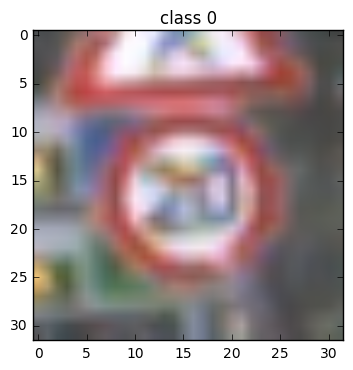

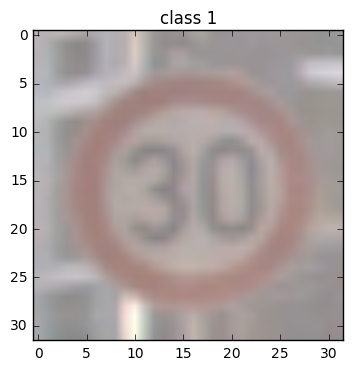

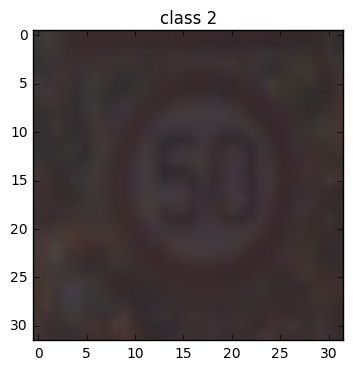

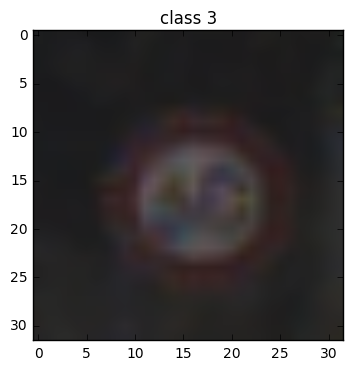

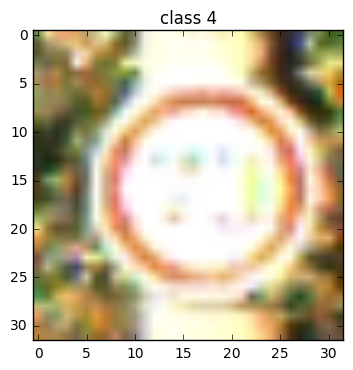

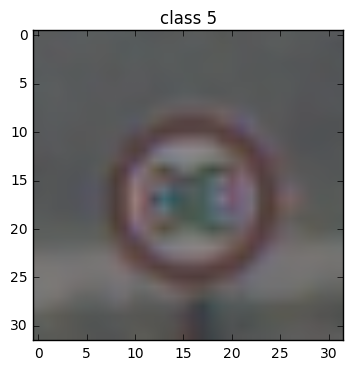

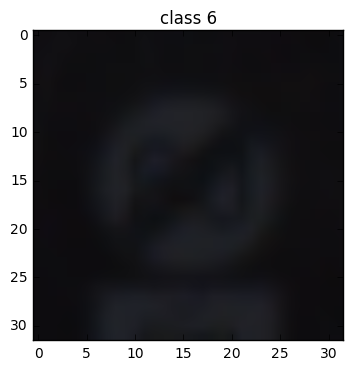

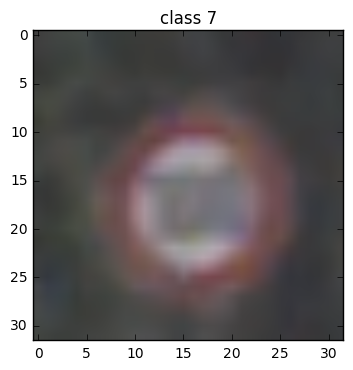

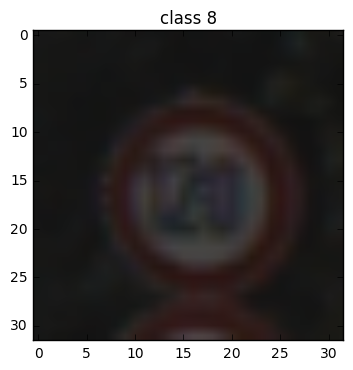

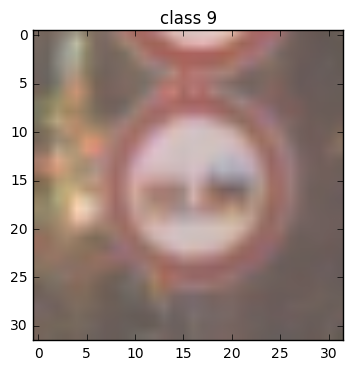

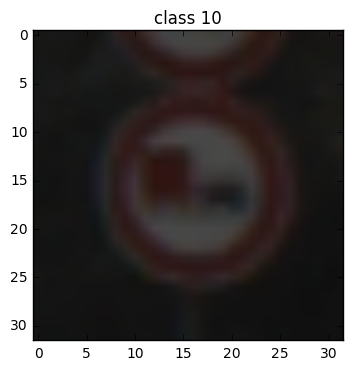

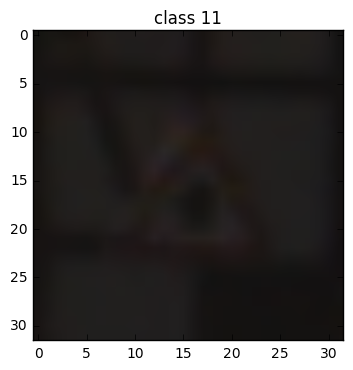

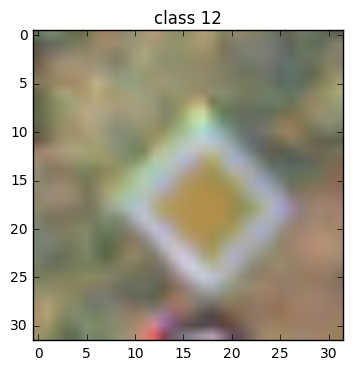

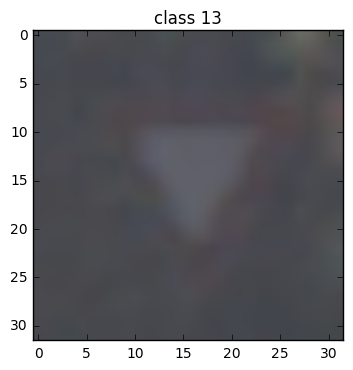

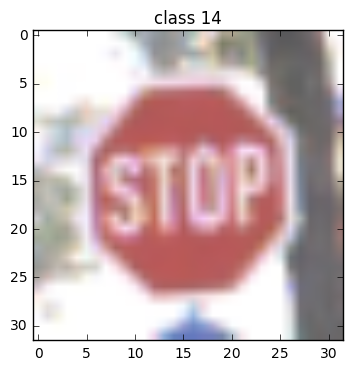

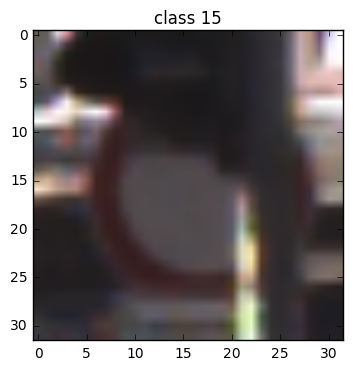

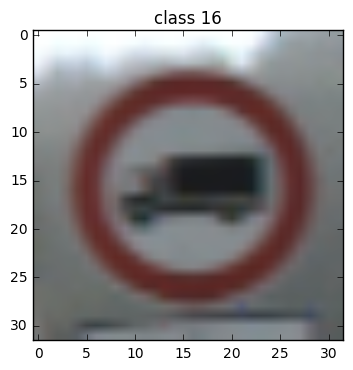

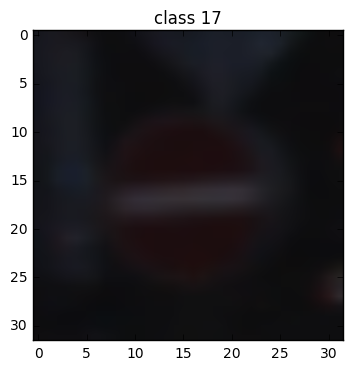

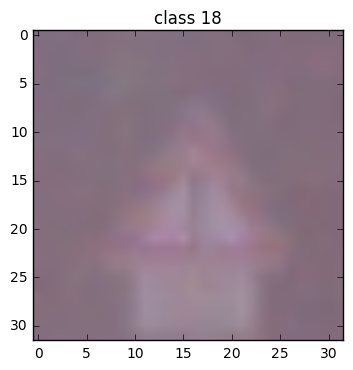

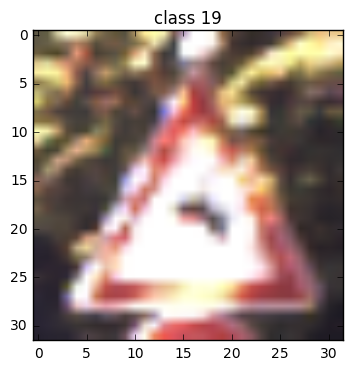

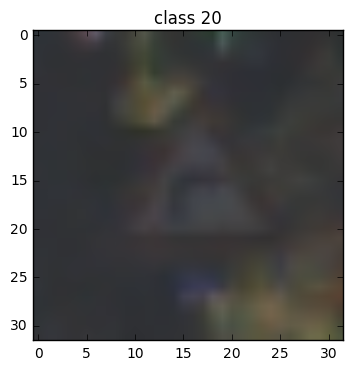

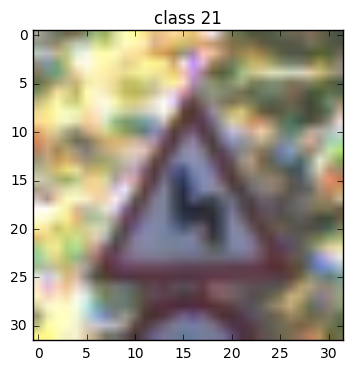

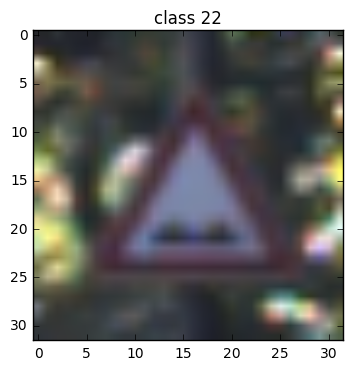

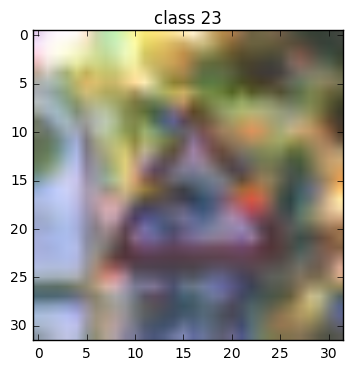

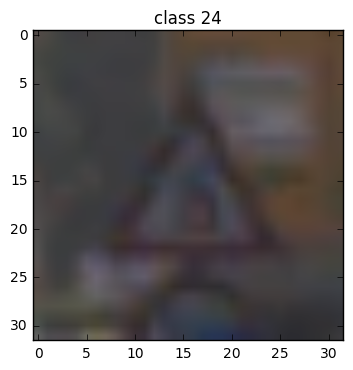

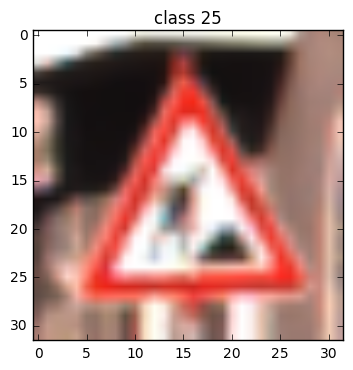

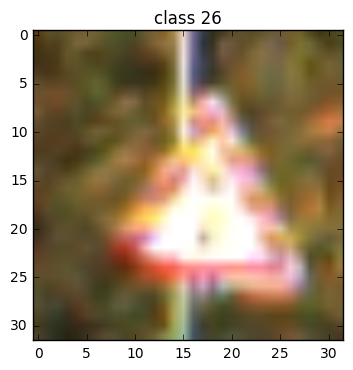

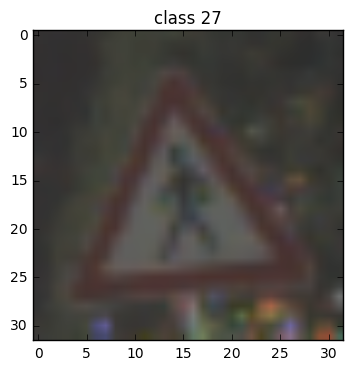

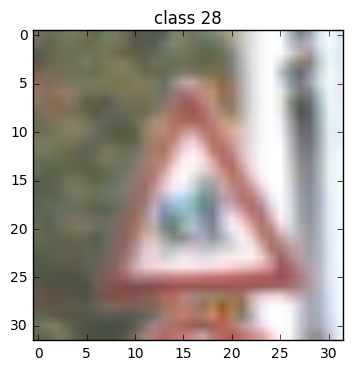

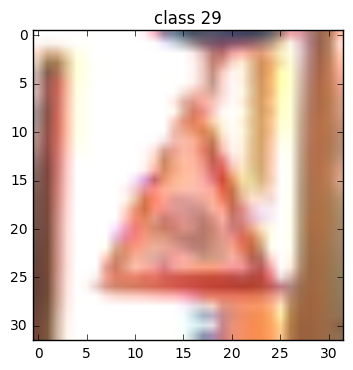

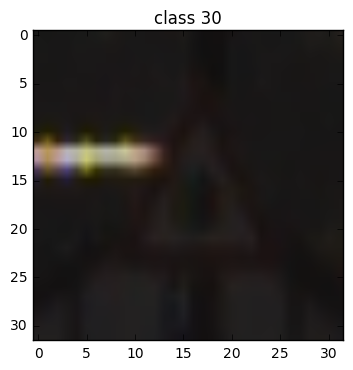

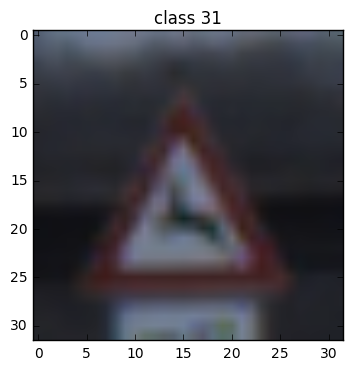

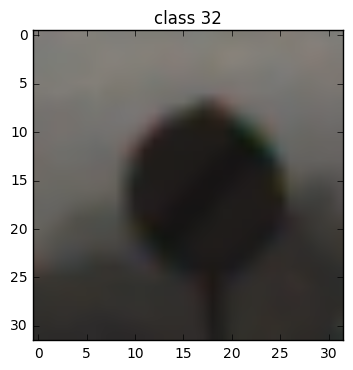

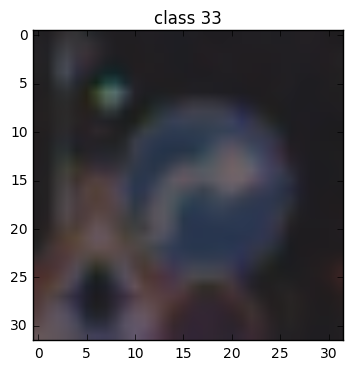

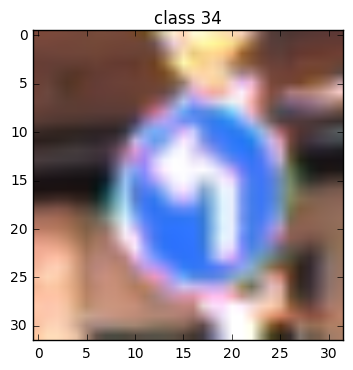

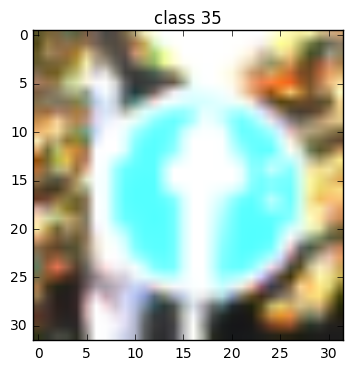

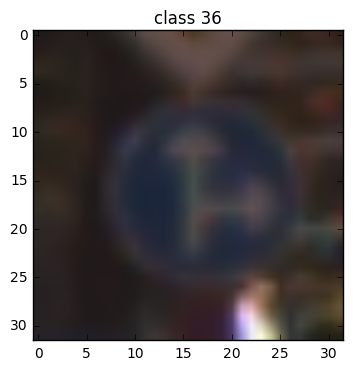

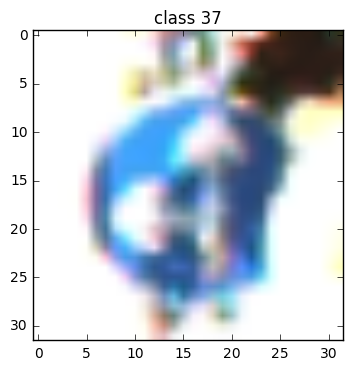

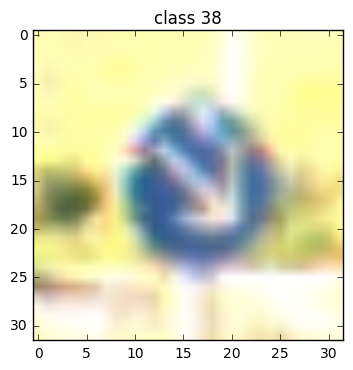

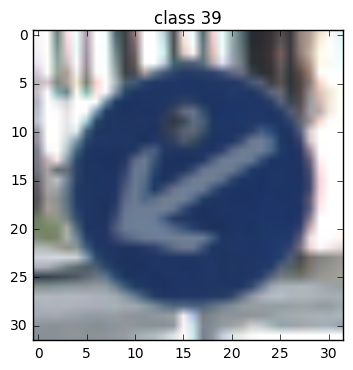

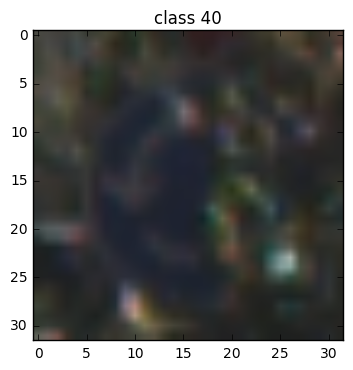

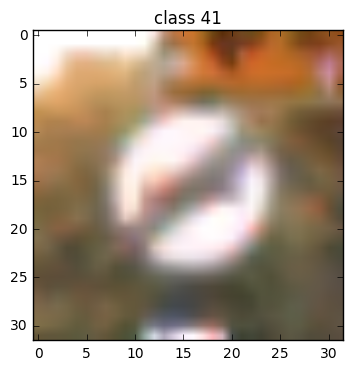

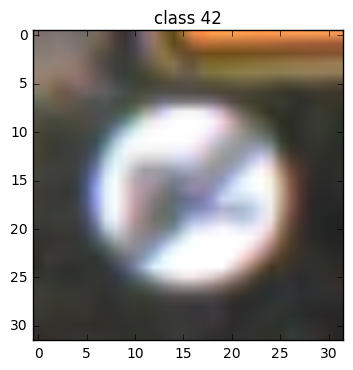

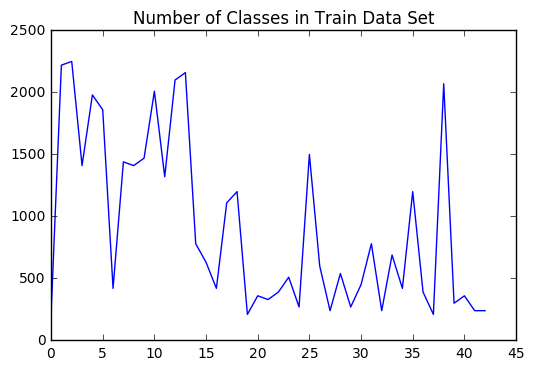

In [13]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# see image of each class
for i in range(n_classes):
    plt.imshow(X_train[np.argwhere(y_train==i)[0][0]])
    plt.title('class %s' % i)
    plt.show()

# inspect the data distribution, if the data is not balance, we should argument data
count_train = []
for i in range(n_classes):
    count = len(y_train[y_train==i]) 
    count_train.append(count)
plt.plot(count_train)
plt.title("Number of Classes in Train Data Set")
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

def normalize(image_data):
    a = 0.01
    b = 0.99
    color_min = 0.0
    color_max = 255.0
    
    return a + ( ( (image_data - color_min) * (b - a) )/(color_max - color_min))

def affine_transform(img):
    """
    Applies affine transfrom to the image to get a
    distorted image that is different from the original one.
    """
    points_before = np.float32([[10,10], [10,20], [20,10]])
    points_after = np.float32([[10+int(6*(random.random() - 0.5)), 10+int(6*(random.random() - 0.5))], 
                               [10+int(6*(random.random() - 0.5)), 20+int(6*(random.random() - 0.5))],
                               [20+int(6*(random.random() - 0.5)), 10+int(6*(random.random() - 0.5))]])
    M = cv2.getAffineTransform(points_before, points_after)
    rows, cols, ch = img.shape
    dst = cv2.warpAffine(img, M, (cols,rows))
    return dst

print('normalize features')
train_features = normalize(X_train)
test_features = normalize(X_test)

print('argument data')
num = 500
for cls in range(n_classes):
    print('transformation class: ', cls)
    print('class ', cls, 'num: ', count_train[cls])
    if count_train[cls] < num: 
        for count in range(num - count_train[cls]): 
            rand = int(count_train[cls] * random.random()) 
            dst = affine_transform(train_features[np.argwhere(y_train==cls)[rand]][0]) 
            train_features = np.append(train_features, [dst], axis=0) 
            y_train = np.append(y_train, [cls], axis=0)

print('labels vectorize')
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

print('split into train and validation dataset')
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=596767)

print('cache to the pickle file')
pickle_file = 'trafficSigns.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': test_features,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

1. Scaled features to 0-1, that will make Neural Network comfortable.
2. Vectorize labels for the Neural Network softmax layer.
3. Data balance and augmented to prevent overfitting and classes unfairness.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
1. I use 5% of test data as the validation set.
2. For the class that images count < 500, I use affine transform to generate distorted images.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I use a lenet-like architecture.

layer 1: convolution layer(32 5*5)

layer 2: maxpooling layer(2*2)

layer 3: convolution layer(64 5*5)

layer 4: maxpooling layer(2*2)

layer 5: full-connected layer(64)

layer 6: full-connected layer(128)

layer 7: softmax layer



In [25]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

tf.reset_default_graph()

# load data
pickle_file = './trafficSigns.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    train_features = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_features = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data 

print("train_features size:", train_features.shape)
print("train_labels size:", train_labels.shape)
print("valid_features size:", valid_features.shape)
print("valid_labels size:", valid_labels.shape)
print("test_features size:", test_features.shape)
print("test_labels size:", test_labels.shape)

# setup tensorflow
EPOCHS = 10
BATCH_SIZE = 128
N_CLASSES = 43
LEARNING_RATE = 0.001

# feature map depth
layer_depth = {
'layer_1': 32,
'layer_2': 64,
'fully_connect_1': 64,
'fully_connect_2': 128
}

mu = 0
sigma = 0.1
# setup weights/biases
weights = {
'layer_1': tf.Variable(tf.truncated_normal(
    [5, 5, 3, layer_depth['layer_1']], mean = mu, stddev = sigma)),
'layer_2': tf.Variable(tf.truncated_normal(
    [5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
'fully_connect_1': tf.Variable(tf.truncated_normal(
    [5 * 5 * layer_depth['layer_2'], layer_depth['fully_connect_1']], mean = mu, stddev = sigma)),
'fully_connect_2': tf.Variable(tf.truncated_normal(
    [layer_depth['fully_connect_1'], layer_depth['fully_connect_2']], mean = mu, stddev = sigma)),
'out': tf.Variable(tf.truncated_normal(
    [layer_depth['fully_connect_2'], N_CLASSES]))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'fully_connect_1': tf.Variable(tf.zeros(layer_depth['fully_connect_1'])),
    'fully_connect_2': tf.Variable(tf.zeros(layer_depth['fully_connect_2'])),
    'out': tf.Variable(tf.zeros(N_CLASSES))
}

def conv2d(X, W, b, strides=1):
    x = tf.nn.conv2d(X, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
  
def maxpool2d(X, k=2):
    return tf.nn.max_pool(X, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

# setup layers
def LeNet(x, weights, biases):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    print('X shape: {}'.format(x.get_shape()))
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    print('CONV1 shape: {}'.format(conv1.get_shape()))
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)
    print('MAXPOOL1 shape: {}'.format(conv1.get_shape()))

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    print('CONV2 shape: {}'.format(conv2.get_shape()))
    # Flatten. Input = 5x5x16. Output = 400.
    flt = flatten(conv2)
    
    print('FLATTEN shape: {}'.format(flt.get_shape()))
    # Layer 3: Fully Connected. 
    fc1 = tf.add(
        tf.matmul(flt, weights['fully_connect_1']),
        biases['fully_connect_1'])
    fc1 = tf.nn.relu(fc1)
    print('FULL CONNECT1 shape: {}'.format(fc1.get_shape()))
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. 
    fc2 = tf.add(
        tf.matmul(fc1, weights['fully_connect_2']),
        biases['fully_connect_2'])
    fc2 = tf.nn.relu(fc2)
    print('FULL CONNECT2 shape: {}'.format(fc2.get_shape()))
    
    # Layer 5: Fully Connected.
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return out

# input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
# [batch_size, n_classes]
y = tf.placeholder(tf.int32, [None, N_CLASSES])
keep_prob = tf.placeholder(tf.float32)

# tf graph
logits = LeNet(x, weights, biases)
softmax_logits = tf.nn.softmax(logits)

# loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y)) + \
       0.001 * tf.nn.l2_loss(weights['layer_1']) + \
       0.001 * tf.nn.l2_loss(weights['layer_2']) + \
       0.001 * tf.nn.l2_loss(weights['fully_connect_1']) + \
       0.001 * tf.nn.l2_loss(weights['fully_connect_2']) + \
       0.001 * tf.nn.l2_loss(weights['out'])
       
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)\
    .minimize(cost)
    
# evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

save_file = './traffic_model.ckpt'
saver = tf.train.Saver()
# lanuch the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(EPOCHS):
        X_train, y_train = shuffle(train_features, train_labels)
        for offset in range(0, len(X_train), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(optimizer, feed_dict={x: batch_x, y:batch_y, keep_prob: 0.5})
        validation_accuracy = evaluate(valid_features, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, save_file)
    test_accuracy = evaluate(test_features, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

train_features size: (40602, 32, 32, 3)
train_labels size: (40602, 43)
valid_features size: (2137, 32, 32, 3)
valid_labels size: (2137, 43)
test_features size: (12630, 32, 32, 3)
test_labels size: (12630, 43)
X shape: (?, 32, 32, 3)
CONV1 shape: (?, 28, 28, 32)
MAXPOOL1 shape: (?, 14, 14, 32)
CONV2 shape: (?, 5, 5, 64)
FLATTEN shape: (?, 1600)
FULL CONNECT1 shape: (?, 64)
FULL CONNECT2 shape: (?, 128)
EPOCH 1 ...
Validation Accuracy = 0.362

EPOCH 2 ...
Validation Accuracy = 0.637

EPOCH 3 ...
Validation Accuracy = 0.851

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.984

EPOCH 9 ...
Validation Accuracy = 0.981

EPOCH 10 ...
Validation Accuracy = 0.985

Test Accuracy = 0.951


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. Optimizer: I use GradientDescentOptimizer at first, but it is too slow, so I choose AdamOptimizer at last.
2. batch size: I tries several batch size, and little difference.
3. epochs: I didn't use early stopping, I found 10 epochs for this model is just good and stable.
4. Dropout: I use dropout at the first full connected layer, and I tried use more dropout in the conv layer, but it not increse the accurary and spend longer time to train, so I just use dropout in one layer.
5. Regularization: I use l2 regularization to prevent overfitting, and it does.
6. Learning rate: i tried 0.1, 0.01, 0.001, and 0.001 is the best.
7. More Neurons: I try to add more neurons to the conv layer and full connected layer, but accuary not increased.

A interesting thining is when i train the neural network, it remains validation accuracy at 0.047, i think it stucked at the stationary point at that time.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. I use lenet similar architecture, it is a start point for doing this job and have enough representation ability, and it does.
2. I tried a lots of paremeters like i answered in the previous question, and finnaly got 95% accurary in the test set. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

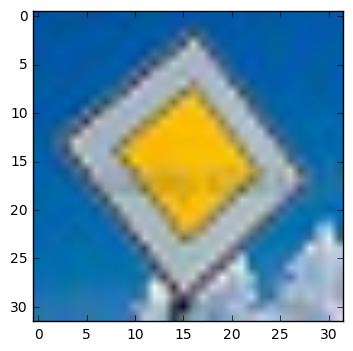

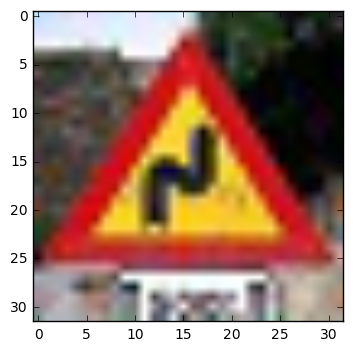

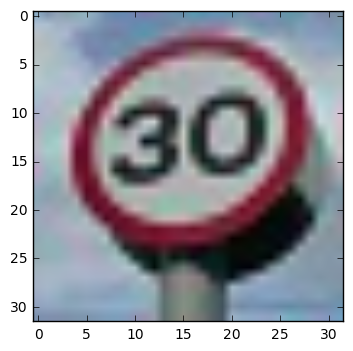

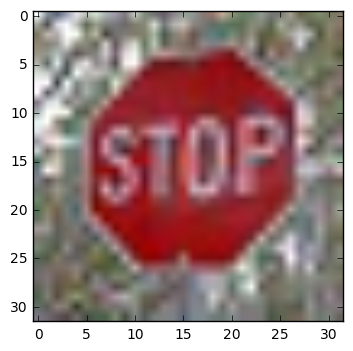

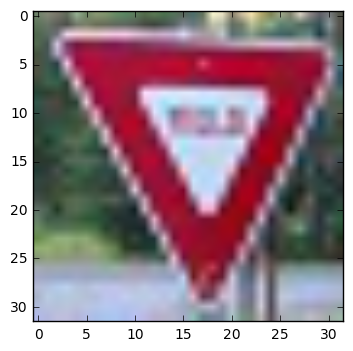

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
img_files = os.listdir('./new_images/')
img_files.sort()
test_images = []
# Show each image
for i in img_files:
    image = './new_images/' + i
    if 'DS' not in image:
        img = plt.imread(image)
        plt.imshow(img)
        plt.show()
        test_images.append(img)
test_images = normalize(np.array(test_images))
test_labels = np.array([[12], [21], [1], [14], [13]])
test_labels = encoder.transform(test_labels)
test_labels = test_labels.astype(np.float32)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I get 60% accuracy in my five candidate images set. the nn predict the wrong class because the wrong class image is similar with the right class.
for example, 30km speed limit sign is similar with 70km speed limit sign.

Image 0, predict class: 12, actuall class: 12


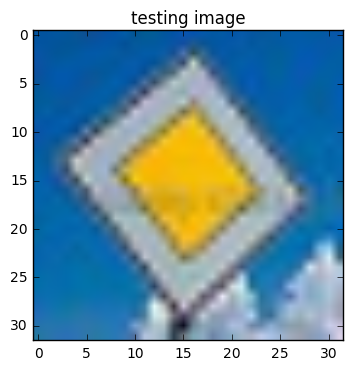

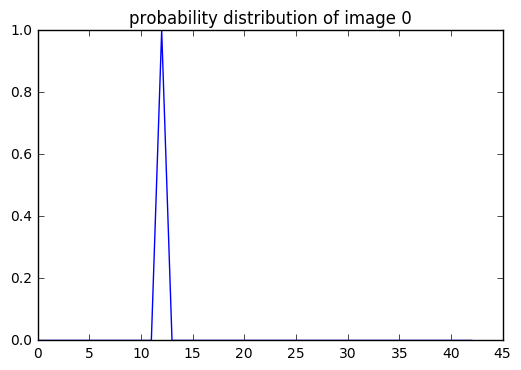

Image 1, predict class: 20, actuall class: 21


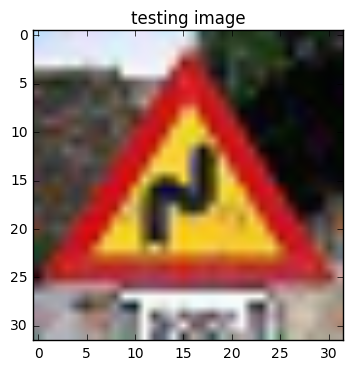

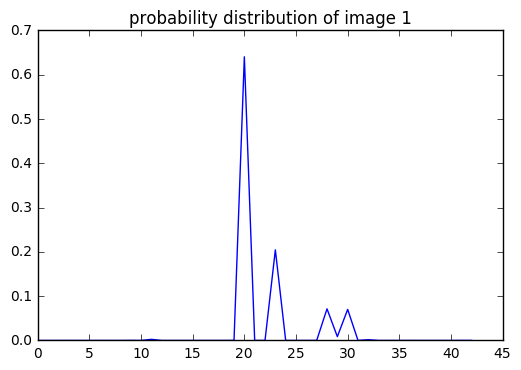

Image 2, predict class: 9, actuall class: 1


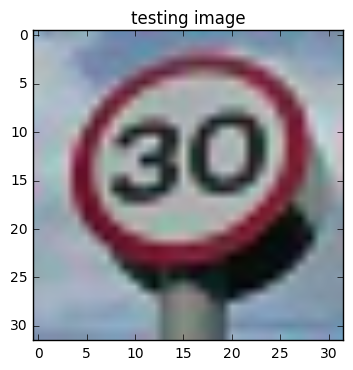

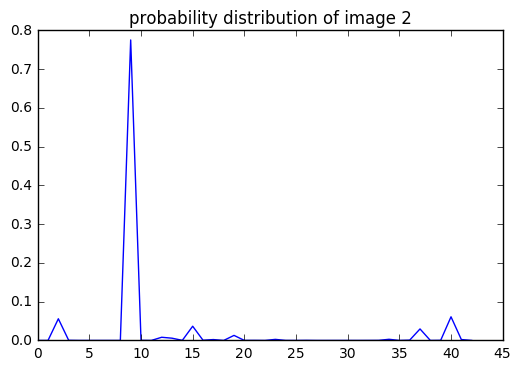

Image 3, predict class: 14, actuall class: 14


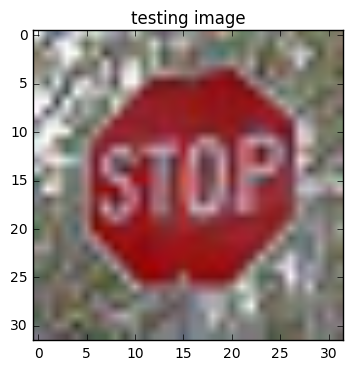

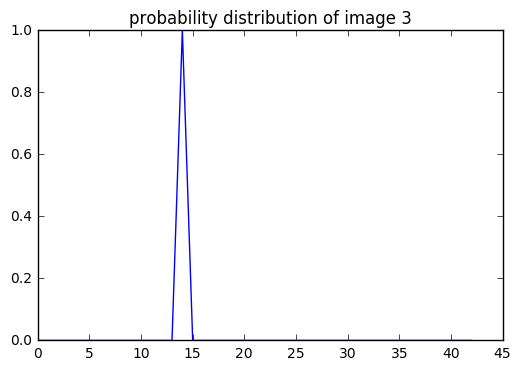

Image 4, predict class: 13, actuall class: 13


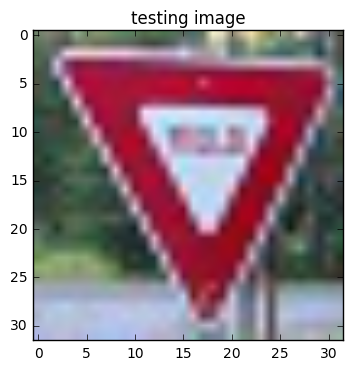

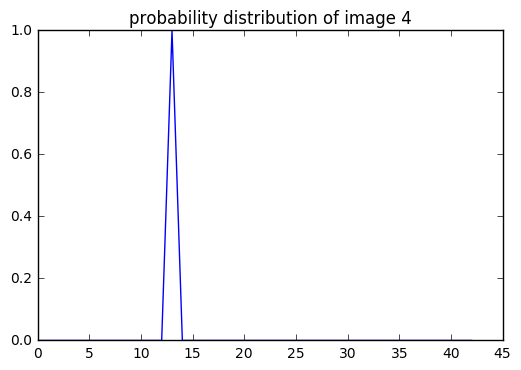

new traffic sign accuary: 0.6


In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# lanuch the session
import tensorflow as tf
save_file = './traffic_model.ckpt'
saver = tf.train.Saver()
right = 0.
with tf.Session() as sess:
    saver.restore(sess, save_file)    
    result = sess.run(softmax_logits, feed_dict={x: test_images, y: test_labels, keep_prob: 1.0})
    for i, r in enumerate(result):
        predict_class = np.argmax(r)
        actuall_class = np.argmax(test_labels[i])
        print('Image %s, predict class: %s, actuall class: %s' % (i, predict_class, actuall_class))
        if predict_class == actuall_class:
            right += 1
        plt.imshow(test_images[i])
        plt.title('testing image')
        plt.show() 
        plt.plot(r)
        plt.title('probability distribution of image %s' % i)
        plt.show()
    print('new traffic sign accuary: %s' % (right / len(result)))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I get 60% accuracy in my five candidate images set. the nn predict the wrong class because the wrong class image is similar with the right class.
for example, 30km speed limit sign is similar with 70km speed limit sign.

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Look at the probability distribution of answer 6, we can see sometimes the Neuron Network has 100% confidence of thinking the wrong class to be the right class. why?

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.